In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [6]:
df = pd.read_csv('SBIN.csv')
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,SBIN,EQ,225.60,236.00,243.65,234.25,243.65,243.65,240.83,2373228,5.715338e+13,NaN,NaN,NaN
1,2000-01-04,SBIN,EQ,243.65,243.65,262.00,238.85,258.00,259.10,251.46,4495741,1.130506e+14,NaN,NaN,NaN
2,2000-01-05,SBIN,EQ,259.10,249.00,264.70,245.00,249.05,248.45,252.35,3434058,8.666008e+13,NaN,NaN,NaN
3,2000-01-06,SBIN,EQ,248.45,252.00,268.00,252.00,260.50,261.00,262.18,6658801,1.745817e+14,NaN,NaN,NaN
4,2000-01-07,SBIN,EQ,261.00,261.50,279.90,255.00,279.00,273.30,269.02,7873985,2.118287e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,2020-10-26,SBIN,EQ,202.80,202.70,204.00,195.60,197.00,196.70,199.33,45471498,9.063790e+14,213023.0,9472379.0,0.2083
5180,2020-10-27,SBIN,EQ,196.70,197.25,197.55,192.25,194.45,194.65,194.96,37802664,7.370107e+14,177545.0,7079292.0,0.1873
5181,2020-10-28,SBIN,EQ,194.65,195.00,195.00,189.05,190.50,190.45,191.54,46462213,8.899259e+14,259437.0,13448807.0,0.2895
5182,2020-10-29,SBIN,EQ,190.45,189.35,190.70,185.90,189.30,188.70,188.17,44823105,8.434162e+14,238791.0,9344991.0,0.2085


In [7]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,SBIN,EQ,225.60,236.00,243.65,234.25,243.65,243.65,240.83,2373228,5.715338e+13,NaN,NaN,NaN
1,2000-01-04,SBIN,EQ,243.65,243.65,262.00,238.85,258.00,259.10,251.46,4495741,1.130506e+14,NaN,NaN,NaN
2,2000-01-05,SBIN,EQ,259.10,249.00,264.70,245.00,249.05,248.45,252.35,3434058,8.666008e+13,NaN,NaN,NaN
3,2000-01-06,SBIN,EQ,248.45,252.00,268.00,252.00,260.50,261.00,262.18,6658801,1.745817e+14,NaN,NaN,NaN
4,2000-01-07,SBIN,EQ,261.00,261.50,279.90,255.00,279.00,273.30,269.02,7873985,2.118287e+14,NaN,NaN,NaN


In [8]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5.184000e+03,5.184000e+03,2.334000e+03,4.670000e+03,4670.000000
mean,981.204880,982.522164,997.663214,965.979958,981.022830,981.197868,982.095966,8.999463e+06,3.835939e+14,1.415825e+05,2.756289e+06,0.281533
std,861.858634,863.014214,874.877331,849.806475,861.608478,861.864930,862.473966,1.611000e+07,3.920775e+14,9.764954e+04,4.729748e+06,0.121526
min,141.450000,142.850000,147.950000,140.050000,140.550000,141.450000,145.900000,3.633000e+03,7.680600e+10,4.016000e+03,1.548000e+04,0.029400
25%,258.437500,258.875000,262.350000,254.850000,258.250000,258.437500,258.242500,1.431046e+06,1.400420e+14,8.360550e+04,3.468592e+05,0.190550
50%,505.675000,504.125000,514.650000,492.025000,504.125000,505.675000,502.370000,2.509438e+06,3.052621e+14,1.131990e+05,6.571515e+05,0.276350
75%,1743.325000,1745.000000,1774.262500,1718.312500,1742.175000,1743.325000,1747.890000,1.055002e+07,4.878573e+14,1.626008e+05,3.906696e+06,0.365000
max,3489.950000,3505.000000,3515.000000,3451.350000,3499.000000,3489.950000,3485.250000,2.626771e+08,8.162141e+15,1.057768e+06,1.333311e+08,0.948200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5184 entries, 0 to 5183
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5184 non-null   object 
 1   Symbol              5184 non-null   object 
 2   Series              5184 non-null   object 
 3   Prev Close          5184 non-null   float64
 4   Open                5184 non-null   float64
 5   High                5184 non-null   float64
 6   Low                 5184 non-null   float64
 7   Last                5184 non-null   float64
 8   Close               5184 non-null   float64
 9   VWAP                5184 non-null   float64
 10  Volume              5184 non-null   int64  
 11  Turnover            5184 non-null   float64
 12  Trades              2334 non-null   float64
 13  Deliverable Volume  4670 non-null   float64
 14  %Deliverble         4670 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 607.6

In [10]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.set_index("Date", drop=False, inplace=True)
df.drop(["Series","Symbol","Trades","Deliverable Volume","%Deliverble"], axis=1, inplace=True)
df

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
Date,,,,,,,,,,
2000-01-03,2000-01-03,225.60,236.00,243.65,234.25,243.65,243.65,240.83,2373228,5.715338e+13
2000-01-04,2000-01-04,243.65,243.65,262.00,238.85,258.00,259.10,251.46,4495741,1.130506e+14
2000-01-05,2000-01-05,259.10,249.00,264.70,245.00,249.05,248.45,252.35,3434058,8.666008e+13
2000-01-06,2000-01-06,248.45,252.00,268.00,252.00,260.50,261.00,262.18,6658801,1.745817e+14
2000-01-07,2000-01-07,261.00,261.50,279.90,255.00,279.00,273.30,269.02,7873985,2.118287e+14
...,...,...,...,...,...,...,...,...,...,...
2020-10-26,2020-10-26,202.80,202.70,204.00,195.60,197.00,196.70,199.33,45471498,9.063790e+14
2020-10-27,2020-10-27,196.70,197.25,197.55,192.25,194.45,194.65,194.96,37802664,7.370107e+14
2020-10-28,2020-10-28,194.65,195.00,195.00,189.05,190.50,190.45,191.54,46462213,8.899259e+14


In [11]:
100 * df.isnull().sum() / len(df)

Date          0.0
Prev Close    0.0
Open          0.0
High          0.0
Low           0.0
Last          0.0
Close         0.0
VWAP          0.0
Volume        0.0
Turnover      0.0
dtype: float64

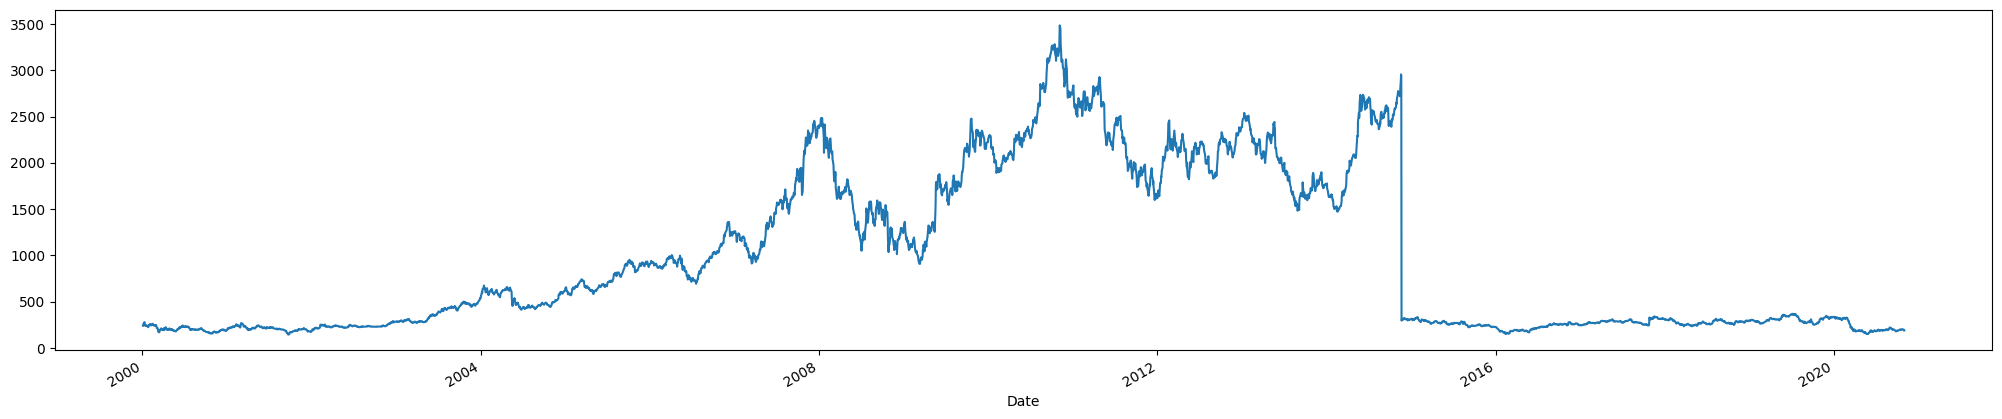

In [12]:
df.VWAP.plot(figsize=(25, 5))
plt.show()

# Represents the data using a continuous probability density curve in one or more dimensions.

C:\Users\Pradeep\AppData\Local\Temp\ipykernel_4040\504767778.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.VWAP, shade=True)


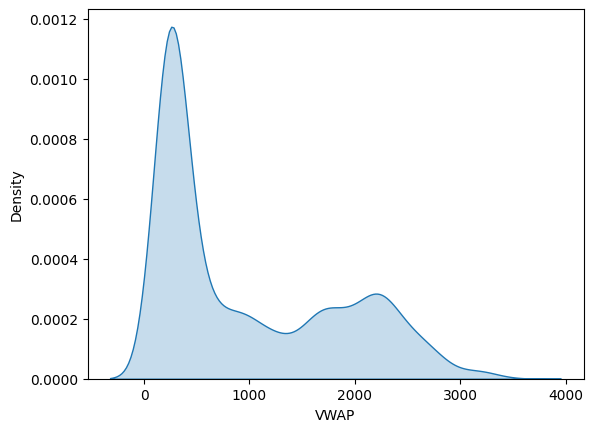

In [13]:
sns.kdeplot(df.VWAP, shade=True)
plt.show()

In [14]:
df["month"] = df.Date.dt.month
df["week"] = df.Date.dt.isocalendar().week
df["day"] = df.Date.dt.isocalendar().day
df["day_of_week"] = df.Date.dt.dayofweek
df.drop(['Date'], axis=1, inplace=True)
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,month,week,day,day_of_week
Date,,,,,,,,,,,,,
2000-01-03,225.60,236.00,243.65,234.25,243.65,243.65,240.83,2373228,5.715338e+13,1,1,1,0
2000-01-04,243.65,243.65,262.00,238.85,258.00,259.10,251.46,4495741,1.130506e+14,1,1,2,1
2000-01-05,259.10,249.00,264.70,245.00,249.05,248.45,252.35,3434058,8.666008e+13,1,1,3,2
2000-01-06,248.45,252.00,268.00,252.00,260.50,261.00,262.18,6658801,1.745817e+14,1,1,4,3
2000-01-07,261.00,261.50,279.90,255.00,279.00,273.30,269.02,7873985,2.118287e+14,1,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,202.80,202.70,204.00,195.60,197.00,196.70,199.33,45471498,9.063790e+14,10,44,1,0
2020-10-27,196.70,197.25,197.55,192.25,194.45,194.65,194.96,37802664,7.370107e+14,10,44,2,1
2020-10-28,194.65,195.00,195.00,189.05,190.50,190.45,191.54,46462213,8.899259e+14,10,44,3,2


In [15]:
indx = df.index
cols = df.columns
(indx, cols)

(DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
                '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
                '2000-01-13', '2000-01-14',
                ...
                '2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22',
                '2020-10-23', '2020-10-26', '2020-10-27', '2020-10-28',
                '2020-10-29', '2020-10-30'],
               dtype='datetime64[ns]', name='Date', length=5184, freq=None),
 Index(['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume',
        'Turnover', 'month', 'week', 'day', 'day_of_week'],
       dtype='object'))

# The data is normalized, i.e. scaled to [0, 1] range

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df)
data = pd.DataFrame(data, index=indx, columns=cols)
df = data
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,month,week,day,day_of_week
Date,,,,,,,,,,,,,
2000-01-03,0.025131,0.027705,0.028423,0.028448,0.030699,0.030521,0.028428,0.009021,0.006993,0.000000,0.000000,0.000000,0.000000
2000-01-04,0.030521,0.029981,0.033872,0.029837,0.034971,0.035135,0.031611,0.017101,0.013841,0.000000,0.000000,0.166667,0.166667
2000-01-05,0.035135,0.031572,0.034674,0.031695,0.032307,0.031955,0.031877,0.013060,0.010608,0.000000,0.000000,0.333333,0.333333
2000-01-06,0.031955,0.032464,0.035654,0.033808,0.035716,0.035703,0.034821,0.025336,0.021380,0.000000,0.000000,0.500000,0.500000
2000-01-07,0.035703,0.035290,0.039189,0.034714,0.041224,0.039376,0.036869,0.029962,0.025943,0.000000,0.000000,0.666667,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,0.018322,0.017801,0.016647,0.016776,0.016808,0.016500,0.016000,0.173097,0.111038,0.818182,0.826923,0.000000,0.000000
2020-10-27,0.016500,0.016180,0.014731,0.015764,0.016049,0.015888,0.014691,0.143901,0.090288,0.818182,0.826923,0.166667,0.166667
2020-10-28,0.015888,0.015511,0.013974,0.014798,0.014873,0.014633,0.013667,0.176868,0.109023,0.818182,0.826923,0.333333,0.333333


# Close is selected for prediction

In [17]:
y = df['Close']
y.index = indx
df.drop(['VWAP', 'Close'], axis=1, inplace=True)
df

,Prev Close,Open,High,Low,Last,Volume,Turnover,month,week,day,day_of_week
Date,,,,,,,,,,,
2000-01-03,0.025131,0.027705,0.028423,0.028448,0.030699,0.009021,0.006993,0.000000,0.000000,0.000000,0.000000
2000-01-04,0.030521,0.029981,0.033872,0.029837,0.034971,0.017101,0.013841,0.000000,0.000000,0.166667,0.166667
2000-01-05,0.035135,0.031572,0.034674,0.031695,0.032307,0.013060,0.010608,0.000000,0.000000,0.333333,0.333333
2000-01-06,0.031955,0.032464,0.035654,0.033808,0.035716,0.025336,0.021380,0.000000,0.000000,0.500000,0.500000
2000-01-07,0.035703,0.035290,0.039189,0.034714,0.041224,0.029962,0.025943,0.000000,0.000000,0.666667,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,0.018322,0.017801,0.016647,0.016776,0.016808,0.173097,0.111038,0.818182,0.826923,0.000000,0.000000
2020-10-27,0.016500,0.016180,0.014731,0.015764,0.016049,0.143901,0.090288,0.818182,0.826923,0.166667,0.166667
2020-10-28,0.015888,0.015511,0.013974,0.014798,0.014873,0.176868,0.109023,0.818182,0.826923,0.333333,0.333333


In [18]:
X = df
X


,Prev Close,Open,High,Low,Last,Volume,Turnover,month,week,day,day_of_week
Date,,,,,,,,,,,
2000-01-03,0.025131,0.027705,0.028423,0.028448,0.030699,0.009021,0.006993,0.000000,0.000000,0.000000,0.000000
2000-01-04,0.030521,0.029981,0.033872,0.029837,0.034971,0.017101,0.013841,0.000000,0.000000,0.166667,0.166667
2000-01-05,0.035135,0.031572,0.034674,0.031695,0.032307,0.013060,0.010608,0.000000,0.000000,0.333333,0.333333
2000-01-06,0.031955,0.032464,0.035654,0.033808,0.035716,0.025336,0.021380,0.000000,0.000000,0.500000,0.500000
2000-01-07,0.035703,0.035290,0.039189,0.034714,0.041224,0.029962,0.025943,0.000000,0.000000,0.666667,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,0.018322,0.017801,0.016647,0.016776,0.016808,0.173097,0.111038,0.818182,0.826923,0.000000,0.000000
2020-10-27,0.016500,0.016180,0.014731,0.015764,0.016049,0.143901,0.090288,0.818182,0.826923,0.166667,0.166667
2020-10-28,0.015888,0.015511,0.013974,0.014798,0.014873,0.176868,0.109023,0.818182,0.826923,0.333333,0.333333


In [19]:
len(X)

5184

In [20]:
cut = int(len(X)*0.8)

X_train = X[:cut]
X_test = X[cut:]
y_train = y[:cut]
y_test = y[cut:]
(X_test, y_test)

(            Prev Close      Open      High       Low      Last    Volume  \
 Date                                                                       
 2016-08-24    0.033836  0.033342  0.032150  0.034261  0.033825  0.043996   
 2016-08-25    0.033732  0.033327  0.031957  0.032782  0.032441  0.080812   
 2016-08-26    0.032462  0.031959  0.030516  0.031951  0.031503  0.062924   
 2016-08-29    0.031402  0.030635  0.030264  0.031468  0.032426  0.044856   
 2016-08-30    0.032134  0.031914  0.031170  0.033144  0.033245  0.058322   
 ...                ...       ...       ...       ...       ...       ...   
 2020-10-26    0.018322  0.017801  0.016647  0.016776  0.016808  0.173097   
 2020-10-27    0.016500  0.016180  0.014731  0.015764  0.016049  0.143901   
 2020-10-28    0.015888  0.015511  0.013974  0.014798  0.014873  0.176868   
 2020-10-29    0.014633  0.013830  0.012697  0.013847  0.014516  0.170628   
 2020-10-30    0.014111  0.013830  0.013083  0.013922  0.014694  0.158054   

In [21]:
print(X_train.shape)
print(X_test.shape)

(4147, 11)
(1037, 11)


# kNN regression

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [23]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [24]:
y_pred = knn.predict(X_test)
y_pred

array([0.0359564 , 0.03372406, 0.03487382, ..., 0.03026728, 0.03031208,
       0.03209646])

C:\Users\Pradeep\AppData\Local\Temp\ipykernel_4040\3982342752.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, shade=True)
C:\Users\Pradeep\AppData\Local\Temp\ipykernel_4040\3982342752.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, shade=True)


<Axes: xlabel='Close', ylabel='Density'>

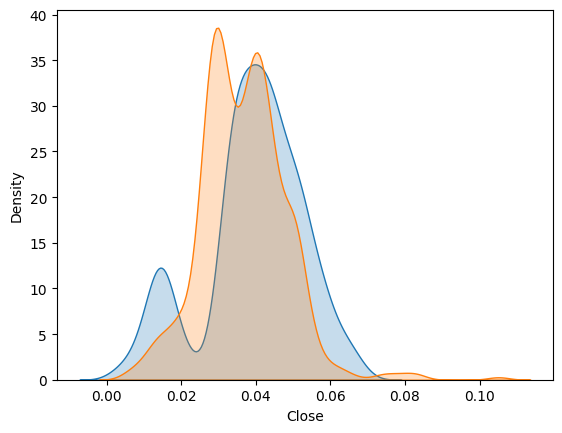

In [25]:
sns.kdeplot(y_test, shade=True)
sns.kdeplot(y_pred, shade=True)

In [26]:
y_test

Date
2016-08-24    0.033732
2016-08-25    0.032462
2016-08-26    0.031402
2016-08-29    0.032134
2016-08-30    0.033089
                ...   
2020-10-26    0.016500
2020-10-27    0.015888
2020-10-28    0.014633
2020-10-29    0.014111
2020-10-30    0.014275
Name: Close, Length: 1037, dtype: float64

In [27]:
np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))

0.011111923859485277

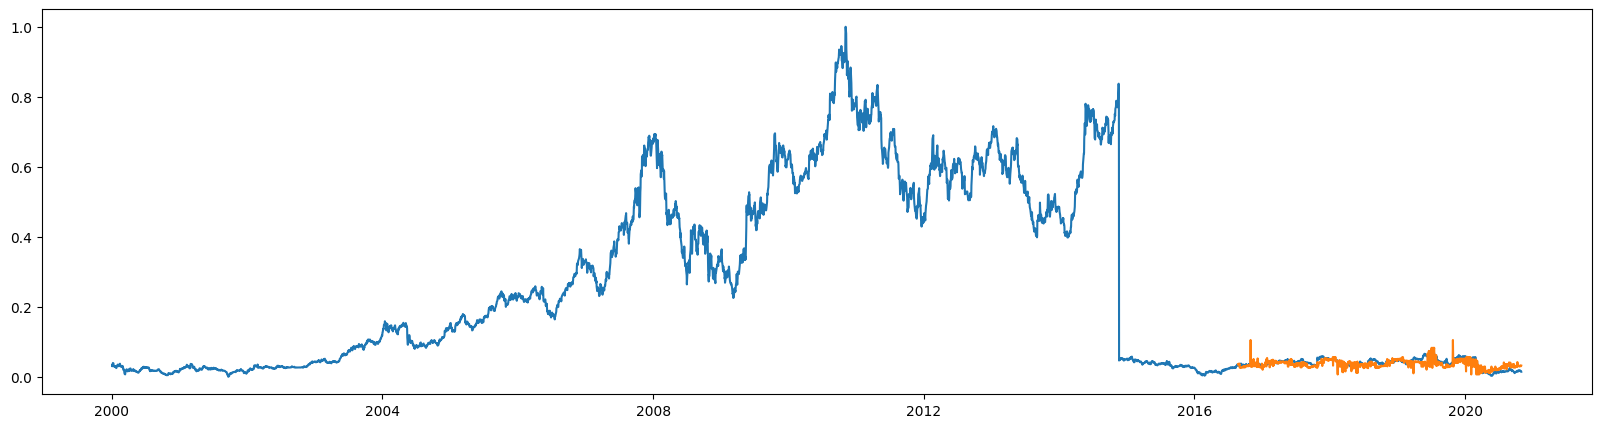

In [28]:
plt.figure(figsize=(20, 5))
plt.plot(y)
plt.plot(y_test.index, y_pred)
plt.show()

In [29]:
from sklearn.metrics.pairwise import euclidean_distances
euc_l = euclidean_distances(X_test, X_train)
euc_l

array([[1.01594785, 0.92979219, 0.89962198, ..., 0.49207193, 0.47316759,
        0.23753844],
       [1.14735098, 1.0181784 , 0.93320413, ..., 0.25400602, 0.70714373,
        0.47174014],
       [1.30439275, 1.1450537 , 1.01685395, ..., 0.11791453, 0.94298468,
        0.70714293],
       ...,
       [1.27079026, 1.20200387, 1.17957123, ..., 0.55015355, 0.55374878,
        0.37727722],
       [1.37464357, 1.26832918, 1.20168886, ..., 0.36898702, 0.76348225,
        0.55433818],
       [1.50774505, 1.37167731, 1.26713922, ..., 0.28395679, 0.98438465,
        0.76286909]])

In [30]:
euclidean_distances(X_test[1:2], X_train[2:3])[0][0]

0.9332041309458945

In [31]:
print(X_test.shape)
print(X_train.shape)
print(euc_l.shape)

(1037, 11)
(4147, 11)
(1037, 4147)


# kNN implementation

In [32]:
def get_val(x_train, test_r, y_test, n_neighbors):
    distances = []
    for i in range(len(x_train)):
        dist = euclidean_distances([test_r], [x_train[i]] )[0][0]
        distances.append((i, dist))
    distances.sort(key=lambda tup: tup[1])
    v = 0
    for i in range(n_neighbors):
        v += y_test[distances[i][0]]
    return v/n_neighbors

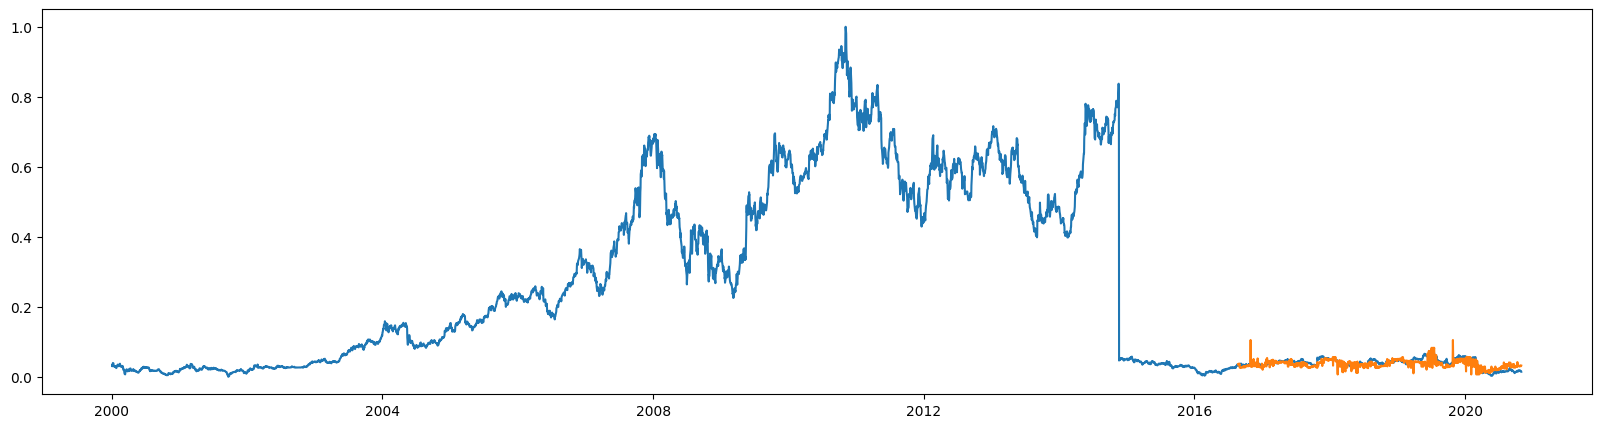

In [33]:
plt.figure(figsize=(20, 5))
plt.plot(y)
plt.plot(y_test.index, y_pred)
plt.show()

In [34]:
np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))

0.011111923859485277

In [35]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
model=ARIMA(df["High"],order=(1,1,0))
model_fit=model.fit()

C:\Users\Pradeep\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Pradeep\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Pradeep\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [37]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   High   No. Observations:                 5184
Model:                 ARIMA(1, 1, 0)   Log Likelihood               14784.373
Date:                Fri, 15 Mar 2024   AIC                         -29564.745
Time:                        15:35:36   BIC                         -29551.639
Sample:                             0   HQIC                        -29560.160
                               - 5184                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0375      0.007      5.678      0.000       0.025       0.050
sigma2         0.0002   1.21e-07   1607.097      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         868719612.79
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              23.78   Skew:                           -35.22
Prob(H) (two-sided):                  0.00   Kurtosis:                      2007.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

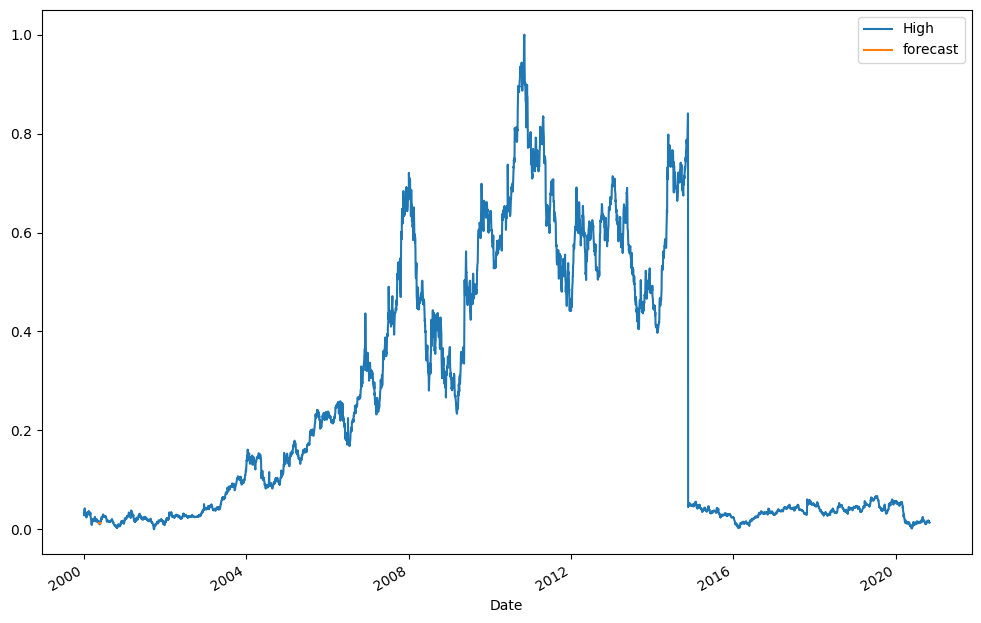

In [38]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['High','forecast']].plot(figsize=(12,8))

In [39]:
import statsmodels.api as sm

In [41]:
model=sm.tsa.statespace.SARIMAX(df['High'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Pradeep\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Pradeep\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Pradeep\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Date'>

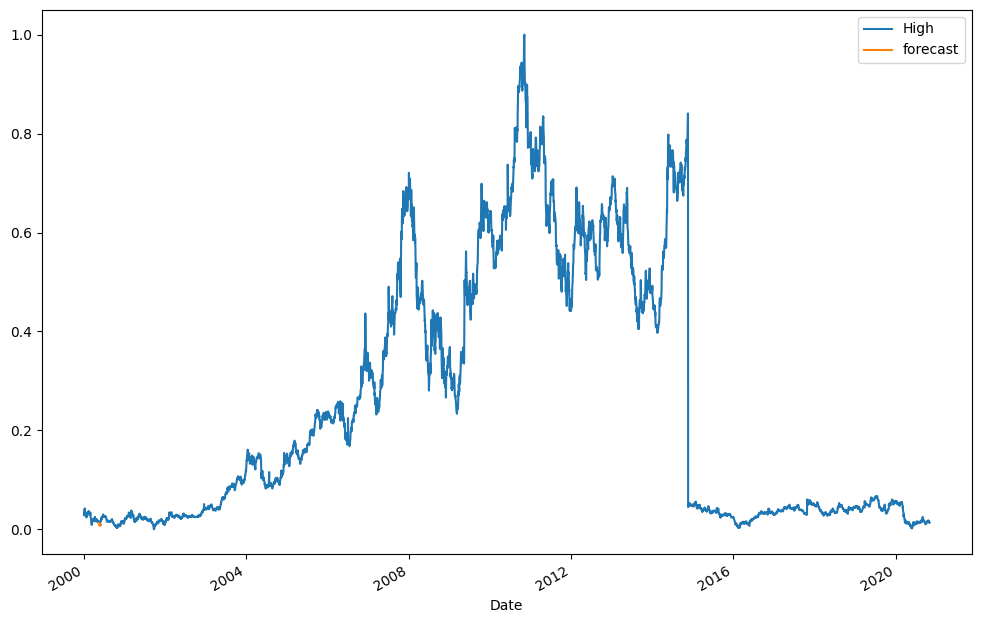

In [42]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['High','forecast']].plot(figsize=(12,8))